In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv('cluster.csv', delimiter = '\t' )

In [3]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
# DIMENSSION DU DATASET
data.shape

(2240, 29)

In [5]:
# TYPES DES VARIABLES
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
# CHECK LES VALEURS MANQUANTE
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# SUPPRIME LES VALEURS MANQUANTES
df = data.dropna(axis = 0)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
# DIMENSSION DU NOUVEAU DATASET
df.shape

(2216, 29)

In [9]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [10]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [11]:
# INDIQUER QUE LA COLONE 'Dt_Customer' EST DE TYPE DATE
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format = '%d-%m-%Y')

In [12]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

# DEFINITION DES METRICS DE BASE POUR LA SEGMENTATION

In [13]:
# CREATION DE VARIABLE DE METRICS
# -- DEPENSSIER (3 CLASSES)
# -- ANCIEN_OU_VOUVEAU (3 CLASSES)
# -- POTENTIEL (3 CLASSES)
# -- NOMBRE D'ENFANTS
# -- AGE DU CLIENT
# -- VIE SEUL ?
# -- NIVEAU ACADEMIQUE

## Création d'une variable 'ANCIEN_OU_VOUVEAU' qui mesure l'ancienete du client

In [14]:
# Liste des dates d'enregistrement

dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
print('Le premier client est enregistré le : ', min(dates) )
print('Le dernier client est enregistré le : ', max(dates) )

Le premier client est enregistré le :  2012-07-30
Le dernier client est enregistré le :  2014-06-29


In [15]:
# Le nombre de jour qu'un clients a passé sur la plateforme par rapport au dernier venu

days = []
d_1 = max(dates) #le dernier client à s'etre enregistré
for i in dates:
    delta = d_1 - i
    days.append(delta)
data["ANCIEN_OU_NOUVEAU"] = days
data["ANCIEN_OU_NOUVEAU"] = pd.to_numeric(data["ANCIEN_OU_NOUVEAU"], errors="coerce")

## Creation des autres variables de base de segmentation

In [16]:
# L'AGE DU CLIENT

data["Age"] = 2021-data["Year_Birth"]

In [17]:
# Vie seul ou à 2

data["vie_seul_?"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [18]:
# DEPENSSIER

data["depense"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [19]:
# NOMBRE D'ENFANTS

data["nb_enfants"]=data["Kidhome"]+data["Teenhome"]

In [20]:
# TAILLE DE LA FAMILLE

data["taille_famille"] = data["vie_seul_?"].replace({"Alone": 1, "Partner":2})+ data["nb_enfants"]

In [21]:
# NIVEAU ACADEMIQUE


data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [22]:
# PARENT ?

data["Parent ?"] = np.where(data.nb_enfants> 0, 1, 0)

In [23]:
# SUPPRESSION DE COLONES JUGE NON NECESSAIRE

suppr_col = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(suppr_col, axis=1)

In [24]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0       58       635         88   
1      Graduate  46344.0        1         1       38        11          1   
2      Graduate  71613.0        0         0       26       426         49   
3      Graduate  26646.0        1         0       26        11          4   
4  Postgraduate  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   Complain  Response  ANCIEN_OU_NOUVEAU  Age  vie_seul_?  depense  \
0         0         1  57283200000000000   64       Alone     1617   
1         0         0   9763200000000000   67       Alone       27   
2         0         0  26956800000000000   56     Partner      776   
3         0         0  12009600000000000   37     Partner       53   
4         0         0  13910400000000000   40     Partner      422   

   nb_enfants  taille_famille  Parent ?  
0           0               1         0  
1           2               3         1  
2           0               2         0  
3           1               3         1  
4           1               3         1  

[5 rows x 30 columns]

In [25]:
# Conversion en jour
data['ANCIEN_OU_NOUVEAU_r'] = data['ANCIEN_OU_NOUVEAU'] / 86400

In [26]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0       58       635         88   
1      Graduate  46344.0        1         1       38        11          1   
2      Graduate  71613.0        0         0       26       426         49   
3      Graduate  26646.0        1         0       26        11          4   
4  Postgraduate  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0              546              172                88  ...         0   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

   Response  ANCIEN_OU_NOUVEAU  Age  vie_seul_?  depense  nb_enfants  \
0         1  57283200000000000   64       Alone     1617           0   
1         0   9763200000000000   67       Alone       27           2   
2         0  26956800000000000   56     Partner      776           0   
3         0  12009600000000000   37     Partner       53           1   
4         0  13910400000000000   40     Partner      422           1   

   taille_famille  Parent ?  ANCIEN_OU_NOUVEAU_r  
0               1         0         6.630000e+11  
1               3         1         1.130000e+11  
2               2         0         3.120000e+11  
3               3         1         1.390000e+11  
4               3         1         1.610000e+11  

[5 rows x 31 columns]

<Figure size 432x288 with 0 Axes>

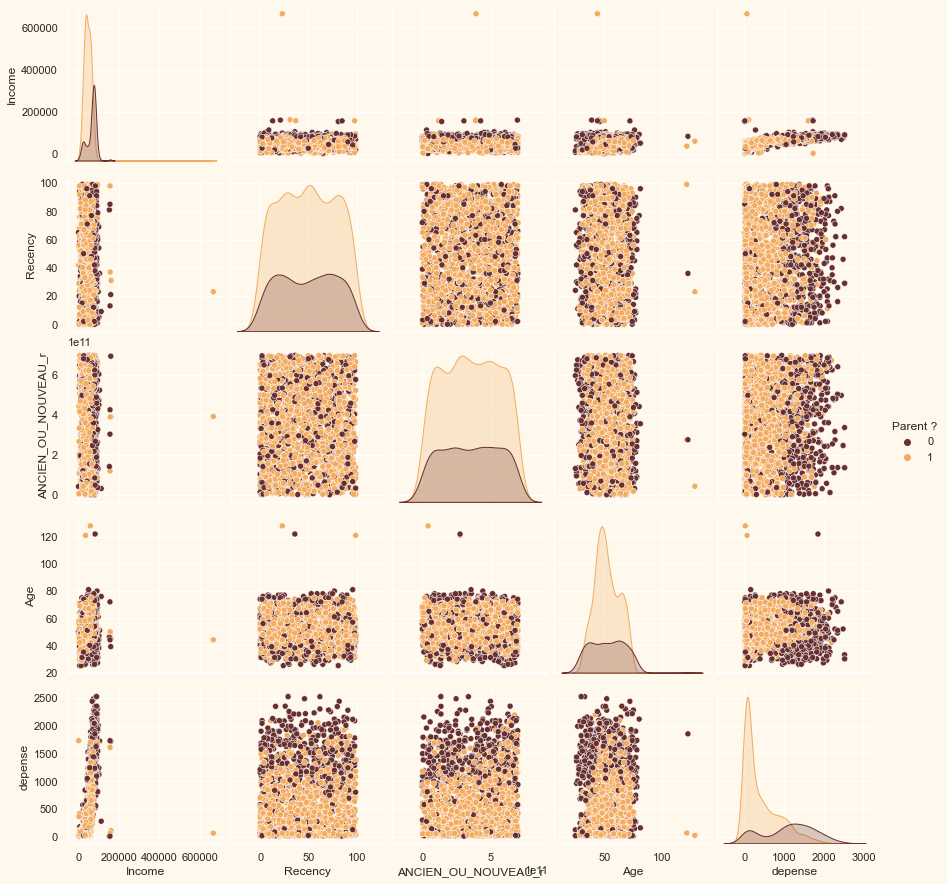

In [27]:
# VISUALISATION DE CERTAINE VARIABLE DE BASE DE SEGMENTATION

#configuration couleur

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = mp.colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#visualisation

To_Plot = [ "Income", "Recency", "ANCIEN_OU_NOUVEAU_r", "Age", "depense", "Parent ?"]

#print("Reletive Plot Of Some Selected Features: A Data Subset")

plt.figure()
sns.pairplot(data[To_Plot], hue= "Parent ?",palette= (["#682F2F","#F3AB60"]))

plt.show()

Ooops des valeurs abérantes, qu'on va supprimer biensûre

In [28]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<150000)]
print("Apres suppression il nous reste :", len(data))

Apres suppression il nous reste : 2205


In [29]:
# VISUALISATION APRES SUPPRESSION DES VALEURS ABERANTES

plt.figure()
sns.pairplot(data[To_Plot], hue= "Parent ?",palette= (["#682F2F","#F3AB60"]))

plt.show()

<Figure size 432x288 with 0 Axes>

On observe la distribution des variables en du fait que le client soit parent ou pas

## EVALUATION DES CORRELATIONS ENTRE LES VARIABLES

In [30]:
# MATRICE DE CORRELATION

mat_corr= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(mat_corr, annot=True, cmap=cmap, center=0)

<AxesSubplot:>

## Encodage

In [31]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [34]:
object_cols

['Education', 'vie_seul_?']

In [39]:
data['vie_seul_?'].value_counts()

Partner    1422
Alone       783
Name: vie_seul_?, dtype: int64

In [40]:
data['Education'].value_counts()

Graduate         1113
Postgraduate      840
Undergraduate     252
Name: Education, dtype: int64

In [41]:
dic_edu = {'Graduate':1 ,
          'Postgraduate':0 ,
          'Undergraduate':2 }
dic_vie_s = {'Partner':1 ,
          'Alone':0}

In [43]:
data['Education'] = data['Education'].replace(dic_edu)


In [45]:
data['vie_seul_?'] = data['vie_seul_?'].replace(dic_vie_s)

## Standardisé les données

In [49]:
# Moyenne sur chaque variable

data.mean(axis = 0)

Education              7.333333e-01
Income                 5.162209e+04
Kidhome                4.421769e-01
Teenhome               5.065760e-01
Recency                4.900907e+01
MntWines               3.061646e+02
MntFruits              2.640317e+01
MntMeatProducts        1.653120e+02
MntFishProducts        3.775646e+01
MntSweetProducts       2.712834e+01
MntGoldProds           4.405714e+01
NumDealsPurchases      2.318367e+00
NumWebPurchases        4.100680e+00
NumCatalogPurchases    2.645351e+00
NumStorePurchases      5.823583e+00
NumWebVisitsMonth      5.336961e+00
AcceptedCmp3           7.392290e-02
AcceptedCmp4           7.437642e-02
AcceptedCmp5           7.301587e-02
AcceptedCmp1           6.439909e-02
AcceptedCmp2           1.360544e-02
Complain               9.070295e-03
Response               1.510204e-01
ANCIEN_OU_NOUVEAU      3.056127e+16
Age                    5.209569e+01
vie_seul_?             6.448980e-01
depense                6.068218e+02
nb_enfants             9.487

In [48]:
# Ecart-type sur chaque variable

data.std(axis = 0)

Education              6.513980e-01
Income                 2.071306e+04
Kidhome                5.371319e-01
Teenhome               5.443801e-01
Recency                2.893211e+01
MntWines               3.374938e+02
MntFruits              3.978448e+01
MntMeatProducts        2.177845e+02
MntFishProducts        5.482463e+01
MntSweetProducts       4.113047e+01
MntGoldProds           5.173621e+01
NumDealsPurchases      1.886107e+00
NumWebPurchases        2.737424e+00
NumCatalogPurchases    2.798647e+00
NumStorePurchases      3.241796e+00
NumWebVisitsMonth      2.413535e+00
AcceptedCmp3           2.617047e-01
AcceptedCmp4           2.624420e-01
AcceptedCmp5           2.602216e-01
AcceptedCmp1           2.455182e-01
AcceptedCmp2           1.158724e-01
Complain               9.482670e-02
Response               3.581500e-01
ANCIEN_OU_NOUVEAU      1.750150e+16
Age                    1.170580e+01
vie_seul_?             4.786528e-01
depense                6.016753e+02
nb_enfants             7.492

In [50]:
# Standardisation

ds = (data - data.mean(axis = 0)) / (data.std(axis = 0))
ds

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0      0.409376  0.314579 -0.823218 -0.930556  0.310760  0.974345   1.548263   
1      0.409376 -0.254820  1.038522  0.906396 -0.380514 -0.874578  -0.638520   
2      0.409376  0.965135 -0.823218 -0.930556 -0.795278  0.355074   0.567981   
3      0.409376 -1.205814  1.038522 -0.930556 -0.795278 -0.874578  -0.563113   
4     -1.125784  0.322063  1.038522 -0.930556  1.555052 -0.394569   0.417168   
...         ...       ...       ...       ...       ...       ...        ...   
2235   0.409376  0.463519 -0.823218  0.906396 -0.104005  1.193608   0.417168   
2236  -1.125784  0.598265  2.900262  0.906396  0.241632  0.295814  -0.663655   
2237   0.409376  0.258721 -0.823218 -0.930556  1.451361  1.783248   0.542845   
2238  -1.125784  0.850811 -0.823218  0.906396 -1.417424  0.361000   0.090408   
2239  -1.125784  0.060199  1.038522  0.906396 -0.311387 -0.658278  -0.588249   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0            1.748003         2.448599          1.479965  ... -0.095651   
1           -0.731512        -0.652197         -0.635255  ... -0.095651   
2           -0.175917         1.335960         -0.148998  ... -0.095651   
3           -0.667228        -0.506277         -0.586629  ... -0.095651   
4           -0.217242         0.150362         -0.003120  ... -0.095651   
...               ...              ...               ...  ...       ...   
2235         0.076626         0.077402          2.209351  ... -0.095651   
2236        -0.621311        -0.688677         -0.659568  ... -0.095651   
2237         0.237335        -0.104998         -0.367814  ... -0.095651   
2238         0.223560         0.770521          0.069818  ... -0.095651   
2239        -0.478969        -0.652197         -0.635255  ... -0.095651   

      Response  ANCIEN_OU_NOUVEAU       Age  vie_seul_?   depense  nb_enfants  \
0     2.370458           1.526837  1.016958   -1.347319  1.678943   -1.266302   
1    -0.421668          -1.188359  1.273241   -1.347319 -0.963679    1.403101   
2    -0.421668          -0.205952  0.333536    0.741878  0.281179   -1.266302   
3    -0.421668          -1.060004 -1.289591    0.741878 -0.920466    0.068400   
4    -0.421668          -0.951397 -1.033307    0.741878 -0.307179    0.068400   
...        ...                ...       ...         ...       ...         ...   
2235 -0.421668           0.134682  0.162681    0.741878  1.220223    0.068400   
2236 -0.421668          -1.652411  1.956663    0.741878 -0.270614    2.737803   
2237 -0.421668          -0.981017 -1.033307   -1.347319  1.054021   -1.266302   
2238 -0.421668          -0.976080  1.102386    0.741878  0.392534    0.068400   
2239  2.370458           1.324431  1.273241    0.741878 -0.722685    1.403101   

      taille_famille  Parent ?  ANCIEN_OU_NOUVEAU_r  
0          -1.758613 -1.584300             1.526837  
1           0.448411  0.630907            -1.188359  
2          -0.655101 -1.584300            -0.205952  
3           0.448411  0.630907            -1.060004  
4           0.448411  0.630907            -0.951397  
...              ...       ...                  ...  
2235        0.448411  0.630907             0.134682  
2236        2.655436  0.630907            -1.652411  
2237       -1.758613 -1.584300            -0.981017  
2238        0.448411  0.630907            -0.976080  
2239        1.551924  0.630907             1.324431  

[2205 rows x 31 columns]

In [51]:
# verifions si c'est belle et bien centré et réduit

ds.mean(axis = 0)

Education             -3.762171e-16
Income                -1.630089e-18
Kidhome                2.744089e-16
Teenhome               8.322896e-16
Recency                9.370182e-17
MntWines              -1.490367e-17
MntFruits             -6.026925e-17
MntMeatProducts        2.144921e-17
MntFishProducts        2.895139e-17
MntSweetProducts       5.251531e-17
MntGoldProds           2.572898e-17
NumDealsPurchases     -1.588550e-17
NumWebPurchases       -2.497121e-16
NumCatalogPurchases   -9.551443e-17
NumStorePurchases      1.580494e-16
NumWebVisitsMonth      4.002845e-17
AcceptedCmp3           1.740608e-16
AcceptedCmp4          -3.375481e-16
AcceptedCmp5          -2.565849e-16
AcceptedCmp1          -8.816329e-17
AcceptedCmp2           5.505800e-17
Complain               9.843474e-17
Response              -1.180210e-16
ANCIEN_OU_NOUVEAU     -9.163746e-17
Age                    1.236602e-16
vie_seul_?             2.452057e-16
depense                1.903239e-17
nb_enfants             1.477

In [52]:
ds.std(axis = 0)

Education              1.0
Income                 1.0
Kidhome                1.0
Teenhome               1.0
Recency                1.0
MntWines               1.0
MntFruits              1.0
MntMeatProducts        1.0
MntFishProducts        1.0
MntSweetProducts       1.0
MntGoldProds           1.0
NumDealsPurchases      1.0
NumWebPurchases        1.0
NumCatalogPurchases    1.0
NumStorePurchases      1.0
NumWebVisitsMonth      1.0
AcceptedCmp3           1.0
AcceptedCmp4           1.0
AcceptedCmp5           1.0
AcceptedCmp1           1.0
AcceptedCmp2           1.0
Complain               1.0
Response               1.0
ANCIEN_OU_NOUVEAU      1.0
Age                    1.0
vie_seul_?             1.0
depense                1.0
nb_enfants             1.0
taille_famille         1.0
Parent ?               1.0
ANCIEN_OU_NOUVEAU_r    1.0
dtype: float64

- Les données ont belle et bien été centré et réduit

## Determiner le nombre de cluster à former sans reduction de dimenssionnalité

Méthode Elbow pour déterminer le nombre de grappes à former:


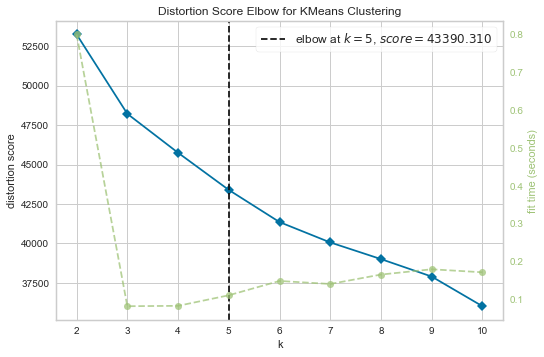

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
print('Méthode Elbow pour déterminer le nombre de grappes à former:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(ds)
Elbow_M.show()

In [59]:
cluster = KMeans(n_clusters = 5)
cluster.fit(ds)

KMeans(n_clusters=5)

In [60]:
clus_pred = cluster.predict(ds)

In [64]:
# Numero affecté au cluster

cluster.labels_

array([3, 4, 3, ..., 3, 0, 4])

In [65]:
# effectif par groupe de cluster

np.unique(cluster.labels_, return_counts = True)

(array([0, 1, 2, 3, 4]), array([559, 594, 164, 382, 506], dtype=int64))

## Visualisons pour trouver les variables qui distinguent le mieux les clusters

In [67]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'ANCIEN_OU_NOUVEAU', 'Age',
       'vie_seul_?', 'depense', 'nb_enfants', 'taille_famille', 'Parent ?',
       'ANCIEN_OU_NOUVEAU_r'],
      dtype='object')

C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


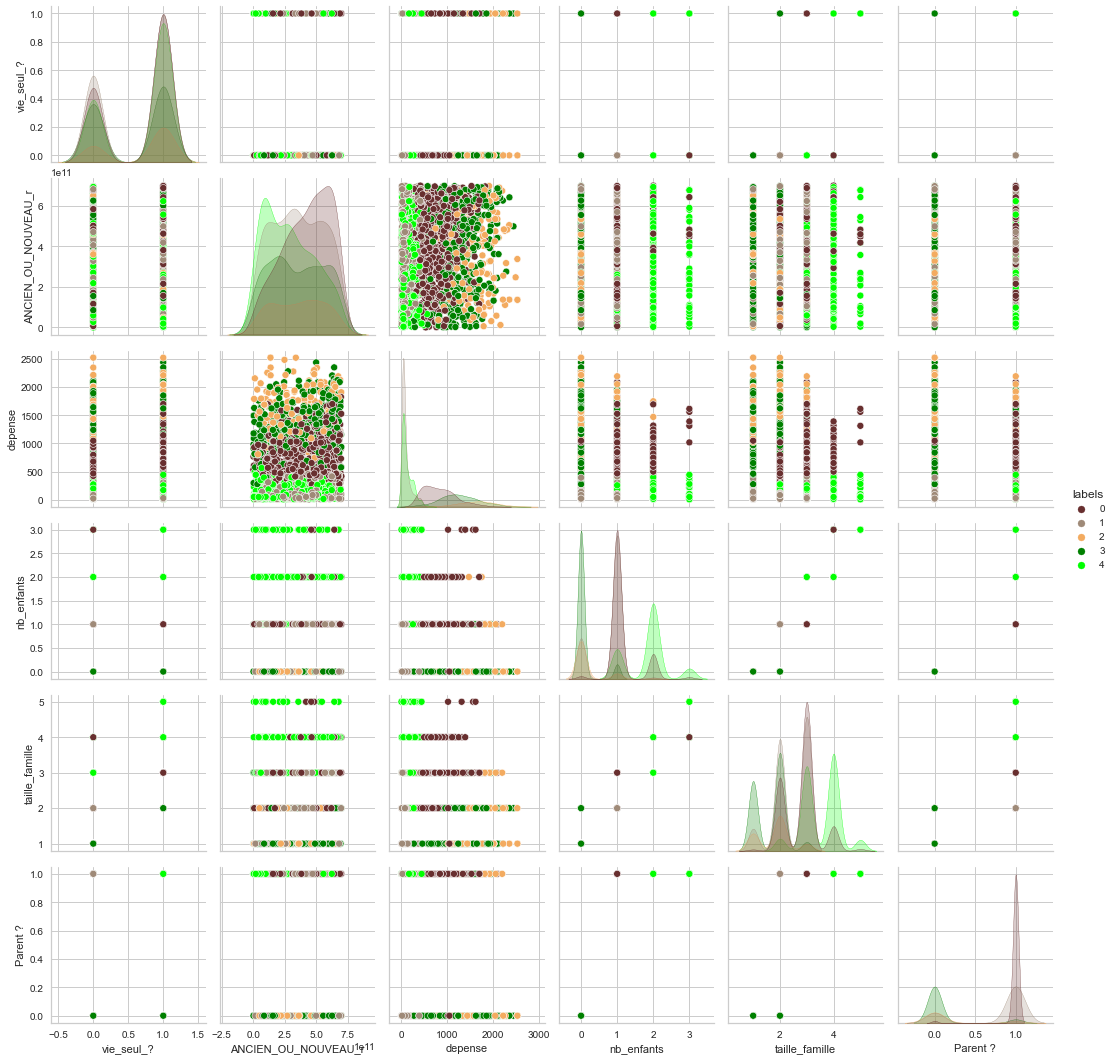

In [73]:
B = data[['vie_seul_?', 'ANCIEN_OU_NOUVEAU_r', 'depense', 'nb_enfants', 'taille_famille', 'Parent ?' ]].copy()
B['labels'] = cluster.labels_
pal = ["#682F2F", "#9F8A78","#F3AB60", "#008000", "#00FF00"]
sns.pairplot(B, hue = 'labels', palette = pal)

In [74]:
C = data[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]].copy()
C['labels'] = cluster.labels_
pal = ["#682F2F", "#9F8A78","#F3AB60", "#008000", "#00FF00"]
sns.pairplot(C, hue = 'labels', palette = pal)

In [83]:
D = ds[['Parent ?', 'depense','Income', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases' ]].copy()
D['labels'] = cluster.labels_
pal = ["#682F2F", "#9F8A78","#F3AB60", "#008000", "#00FF00"]
sns.pairplot(D, hue = 'labels', palette = pal)

C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


In [85]:
E = ds[['depense','Income', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases' ]].copy()
E['labels'] = cluster.labels_
pal = ["#682F2F", "#9F8A78","#F3AB60", "#008000", "#00FF00"]
sns.pairplot(E, hue = 'labels', palette = pal)

C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\iatrade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


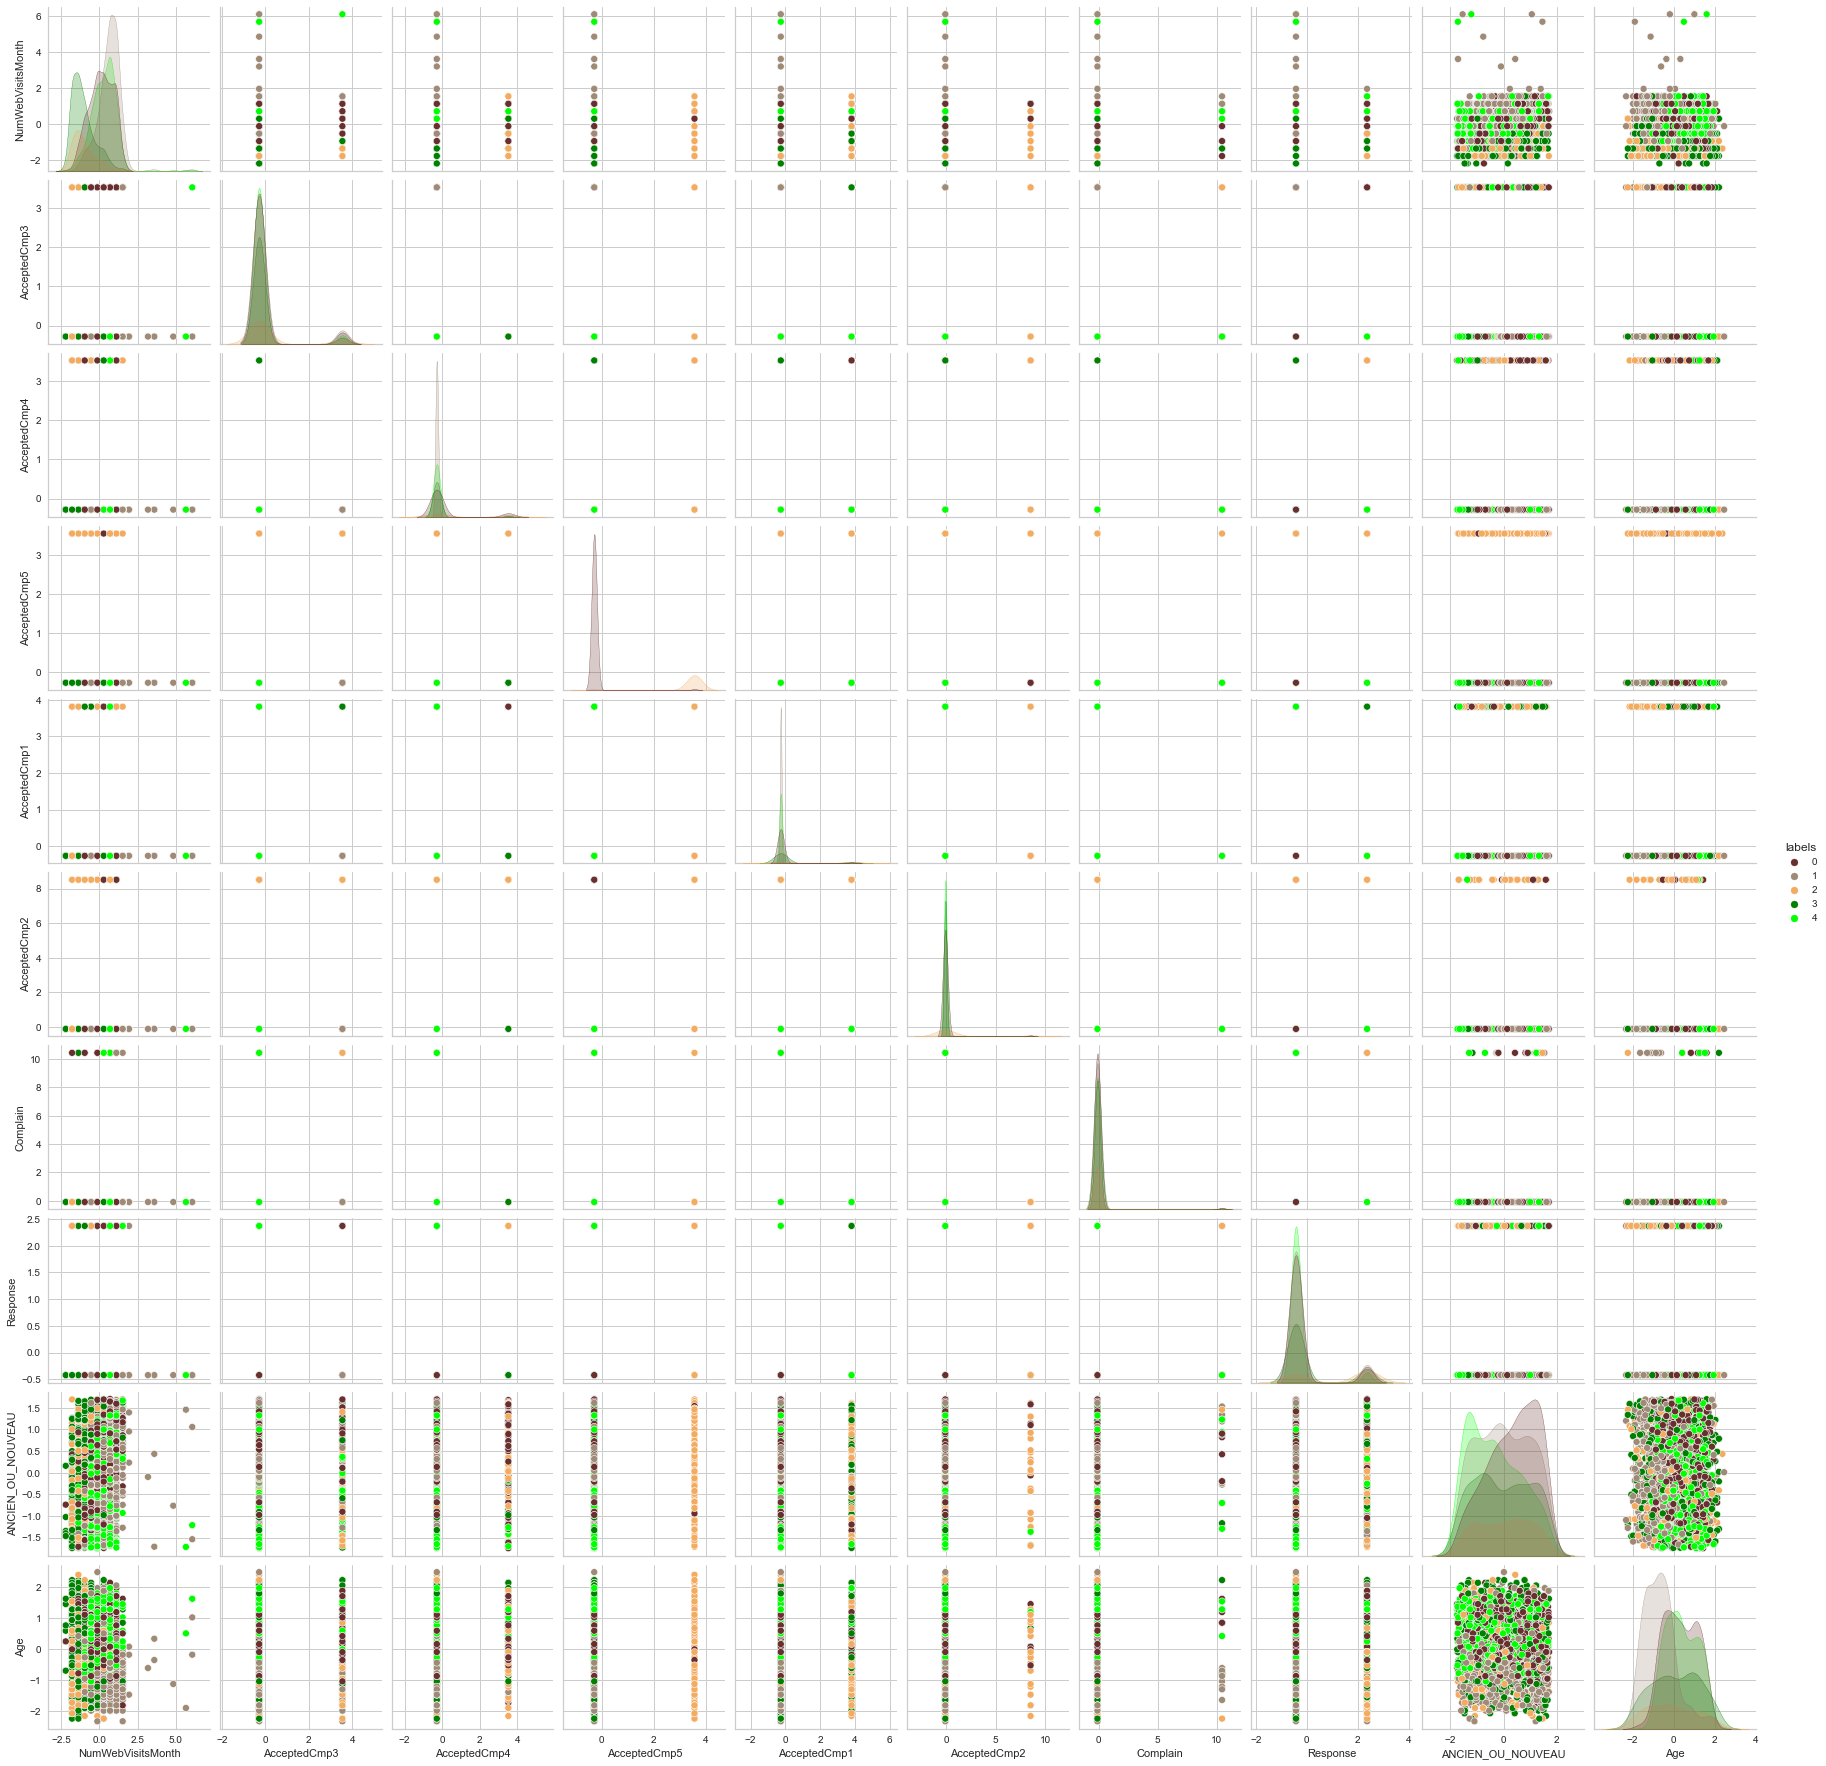

In [86]:
F = ds[['NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'ANCIEN_OU_NOUVEAU', 'Age']].copy()
F['labels'] = cluster.labels_
pal = ["#682F2F", "#9F8A78","#F3AB60", "#008000", "#00FF00"]
sns.pairplot(F, hue = 'labels', palette = pal)

Au vu des nombreuses visualisations il en ressort des distributions que les variables qui distinguent le mieux les clusters ne sont bien percevable il serait interessant d'accroitre les recherches vers d'autre algorithme de clustering.